# SVMs - Support Vector Machines

SVM separates the data pertaining to classes by linearly seperating the classes by drawing decision boundary between them (aka refered as line mostly). In addition, MARGIN is really important term to undertsand, looking at below example there could be many lines which seperate these classes, however the line which separates the data with maximum distance between point from the line is the best separation line to be considered. Maximum Margin helps make the algorithm robust deriving high accuracy minimizing noise.

![SVM](images/ml8.png)

**Wikipedia Definition**
In machine learning, support vector machines (SVMs, also support vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. 

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The **support vector clustering**[2] algorithm created by **Hava Siegelmann and Vladimir Vapnik**, applies the statistics of support vectors, developed in the support vector machines algorithm, to categorize unlabeled data, and is one of the most widely used clustering algorithms in industrial applications.


### What if there are outlers, i.e. there is no way to linearly separate  the classes.

SVM is smart enough to ignore the outliers & try to acheive the best decision boundary linearly separating classes which maximizes the Margin.

![SVM](images/ml9.png)

# Let's Code SVM

Trying to train the Acceleration Module of Car to decide acceleration based in bumpiness and slope of the terrian.

1. We will generate data
2. Classify using SVM
3. Predict
4. Plot

#### Terrain Data Preparation 

In [1]:
#!/usr/bin/python
import random


def makeTerrainData(n_points=1000):
###############################################################################
### make the toy dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

#    training_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
#            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}


    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test
#    return training_data, test_data

#### Visualization Library

In [2]:
#!/usr/bin/python

#from udacityplots import *
import warnings
warnings.filterwarnings("ignore")

import matplotlib 
matplotlib.use('agg')

import matplotlib.pyplot as plt
import pylab as pl
import numpy as np

#import numpy as np
#import matplotlib.pyplot as plt
#plt.ioff()

def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="fast")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="slow")
    plt.legend()
    plt.xlabel("bumpiness")
    plt.ylabel("grade")

    plt.savefig("test.png")
    
import base64
import json
import subprocess

def output_image(name, format, bytes):
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = base64.encodestring(bytes)
    print (image_start+json.dumps(data)+image_end)

#### Classifier

In [12]:
def classify(features_train, labels_train):   
    ### import the sklearn module for GaussianNB
    ### create classifier
    ### fit the classifier on the training features and labels
    ### return the fit classifier
    from sklearn.svm import SVC
    clf = SVC(kernel="linear")
    return clf.fit(features_train,labels_train)

#### Main Class

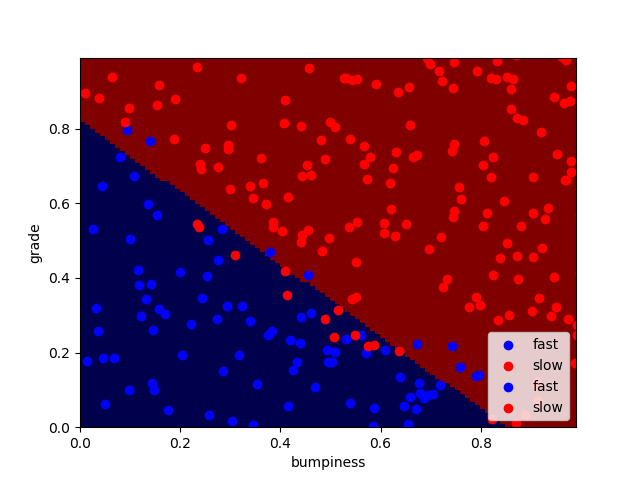

In [13]:
#!/usr/bin/python

""" Complete the code in ClassifyNB.py with the sklearn
    Naive Bayes classifier to classify the terrain data.
    
    The objective of this exercise is to recreate the decision 
    boundary found in the lesson video, and make a plot that
    visually shows the decision boundary """


#from prep_terrain_data import makeTerrainData
#from class_vis import prettyPicture, output_image
#from ClassifyNB import classify

import numpy as np
import pylab as pl
from IPython.display import Image


features_train, labels_train, features_test, labels_test = makeTerrainData()

### the training data (features_train, labels_train) have both "fast" and "slow" points mixed
### in together--separate them so we can give them different colors in the scatterplot,
### and visually identify them
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


# You will need to complete this function imported from the ClassifyNB script.
# Be sure to change to that code tab to complete this quiz.
clf = classify(features_train, labels_train)



# ### draw the decision boundary with the text points overlaid
prettyPicture(clf, features_test, labels_test)
#output_image("test.png", "png", open("test.png", "rb").read())
Image("test.png")

#### Let's run some prediction on test data

In [14]:
pred = clf.predict(features_test)

#### Let's evaluate / do accuracy test of our classifier

Three ways:
1. Check element by element our predictions with test labels
2. sklearn accuracy_score function to compute this for us ..
3. sklearn score function to predict & score

In [15]:
# Element by Elemnt comparison

compare_perd = np.equal(pred,labels_test,where=True)
correct_pred = [x for i, x in enumerate(compare_perd) if x]

# mean : # of correct pred / Total Pred 

accuracy = len(correct_pred) / len(pred)
accuracy

0.92

In [16]:
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score

accuracy_score(pred, labels_test)

0.92000000000000004

In [17]:
# sklearn score function
clf.score(features_test, labels_test, sample_weight=None)

0.92000000000000004

# We have seen SVM do pretty darn good job with linear-separation but can SVMs handle Non-Linear data??

Whatever we have studied thus far, SVM does a linear seperation of classes, so ideally SVM should not be able to classify non-linear data.

However, there are some neat tricks to have SVM work in non-linear classification use-cases.

Let's build intuition, so if we in addition to featue set x & y, create a new feature set called z which is nothing but $x^2 + y^2$, it is interesting to see that z which is nothing but distance from origin draws a plane which is linearly seperable, as shown below ..

![SVM](images/ml10.png)

To continue further, the straight line which shows how x & z are linearly separable, corresponds to circle on the left. The circle of equal distance to the origin in the coordinate system.

So as we added this new feature(it is not always the one defined), SVM is able to separate classes over non-linear surface.

![SVM](images/ml11.png)

Let's look at another example. 

In this case, absolute of |x| will do the magic instead of other feature choices listed, |x| will move all values to positive coordinates and in fact will create flip of what x looks like, whcih will eventually help data be to linearly separable as show below ..

![SVM](images/ml12.png)

After adding new feature 'absolute of x'

![SVM](images/ml13.png)

So how does this look like in original space of x & y, it is non-linear, as it as inflection point joining 2 lines. This is non-trivial to see but addition if this new feature can help SVM classify non-linear classes in this case.

![SVM](images/ml14.png)

SVMs has notion called Kernel Tricks, these are behind the scene convert 2 dimensional space to higher dimensional space. As discussed above this help achieve non-linearity with decision boundaries.

![SVM](images/ml15.png)

There are various choices to Kernel's to choose from (including custom):
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

We used Linear Kernel and RBF is used for non-linear.

## Parameters in Machine Learning

These are arguments passed to the classifier and they can make huge difference wrt decision boundaries.

**So what are the key parameters for the SVM ??**

1. Kernel
2. C
3. Gama

We have studied Kernel already, let's look at Gama
Example .. 

![SVM](images/ml16.png)


The 'gamma' parameter actually has no effect on the 'linear' kernel for SVMs. The key parameter for this kernel function is "C", which is described on the following video.

So how do we know which value Gama impact decision boundary in what way ..

Per documentation, gama determines how far the influence is drawing decision boundary considering data points. 

Low Values of gama, look for farthest data points and in essence leads to more straighter decision boundary.

![SVM](images/ml19.png)

High Values of gama, look for nearest data points and in essence leads to more curvy / non-linear decision boundary.

![SVM](images/ml20.png)


** C Parameter **

![SVM](images/ml18.png)


Detailed Literature on Gama & C Values ..
http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
                    

### Overfitting

Overfitting is the scenario where decision boundary is very closely following classes data points. In other words, it has memorized the training data way too much, and will fail to generalize.

![SVM](images/ml21.png)


As shown above, in the particular case of SVMs - values for C, Gama &  Kernel can all lead to this situation.

## SVMs Strength and Weaknesses

**Strengths**
1. They work very well in complicated domains where there is clear margin of separation.

**Weaknesses**
1. They do not work very well in large datasets, as the training time happens to be cubic in the size of the data set.
2. They do not work with lots of noise, so when classes are overlapping you have to count independet evidence. (And this is the situation Naive Bayes may be better choice)





# SVM Mini Project : https://github.com/anshoomehra/ud120-projects/tree/master/svm

In [33]:
#!/usr/bin/python

import pickle
#import cPickle
#import _pickle as cPickle
import numpy

from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif



def preprocess(words_file = "../ud120-projects/tools/word_data.pkl", authors_file="../ud120-projects/tools/email_authors.pkl"):
    """ 
        this function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        after this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """

    ### the words (features) and authors (labels), already largely preprocessed
    ### this preprocessing will be repeated in the text learning mini-project
    authors_file_handler = open(authors_file, "r")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    words_file_handler = open(words_file, "r")
    #word_data = cPickle.load(words_file_handler)
    word_data = pickle.load(words_file_handler)
    words_file_handler.close()

    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=10)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print ("no. of Chris training emails:", sum(labels_train))
    print ("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test


In [34]:
features_train, features_test, labels_train, labels_test = preprocess()

('no. of Chris training emails:', 7936)
('no. of Sara training emails:', 7884)


In [11]:
features_train.shape

(15820, 3785)

In [13]:
features_test[10].reshape(1,-1).shape

(1, 3785)

In [35]:
import sys
from time import time

sys.path.append("../tools/")
from sklearn.svm import SVC
# sklearn accuracy_score function
from sklearn.metrics import accuracy_score

## Trim down training data set to just 1% of total data for trying impact on accuracy & run time ..
#features_train = features_train[:len(features_train)/100]
#labels_train = labels_train[:len(labels_train)/100]

clf = SVC(kernel="rbf", C=10000.)

## Time track to train
t0 = time()

# Train the Classifier
clf.fit(features_train, labels_train)

print "Training Time:", round(time()-t0, 3), "s"

## Time track to predict
t0 = time()

# Prediction on test data
pred = clf.predict(features_test)

#print ("Prediction :", pred)

print "Prediction Time:", round(time()-t0, 3), "s"

# Overall Accuracy
accuracy_score = accuracy_score(pred, labels_test)

print ("Accuracy Score: ", accuracy_score)

Training Time: 106.23 s
Prediction Time: 11.541 s
('Accuracy Score: ', 0.99089874857792948)


In [30]:
# Prediction on test data
pred = clf.predict(features_test[10].reshape(1,-1))

In [36]:
len(pred[pred == 1])

877